In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df_temp = pd.read_csv(r"~/Desktop/df_chgm_clmt.csv")
df_temp.head()

,Year,Glob,NHem,SHem,24N-90N,24S-24N,90S-24S,64N-90N,44N-64N,24N-44N,EQU-24N,24S-EQU,44S-24S,64S-44S,90S-64S,CH[4],CO[2],N[2]*O
0,1880,-0.17,-0.29,-0.04,-0.37,-0.12,-0.02,-0.80,-0.48,-0.29,-0.16,-0.09,-0.04,0.05,0.66,109.839826,7897.383133,1.846730
1,1881,-0.08,-0.18,0.01,-0.35,0.11,-0.07,-0.91,-0.43,-0.21,0.09,0.12,-0.05,-0.07,0.58,111.086810,7947.907705,1.867070
2,1882,-0.11,-0.22,-0.01,-0.31,-0.04,0.01,-1.41,-0.26,-0.17,-0.06,-0.03,0.01,0.04,0.61,112.358353,8171.126698,1.884569
3,1883,-0.17,-0.29,-0.06,-0.35,-0.16,-0.01,-0.19,-0.54,-0.28,-0.18,-0.14,-0.04,0.07,0.49,113.742016,8411.151301,1.899797
4,1884,-0.28,-0.43,-0.14,-0.60,-0.14,-0.14,-1.30,-0.62,-0.48,-0.13,-0.15,-0.19,-0.02,0.64,114.611282,8472.981793,1.913325


In [57]:
df_sea = pd.read_csv(r"~/Desktop/epa-sea-level.csv")
df_sea.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


In [61]:
# Fusionner les DataFrames df et df_sea
df = df_temp.merge(df_sea, on='Year', how='inner')

# Afficher le DataFrame fusionné
df.head()

,Year,Glob,NHem,SHem,24N-90N,24S-24N,90S-24S,64N-90N,44N-64N,24N-44N,...,44S-24S,64S-44S,90S-64S,CH[4],CO[2],N[2]*O,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,-0.17,-0.29,-0.04,-0.37,-0.12,-0.02,-0.80,-0.48,-0.29,...,-0.04,0.05,0.66,109.839826,7897.383133,1.846730,0.000000,-0.952756,0.952756,NaN
1,1881,-0.08,-0.18,0.01,-0.35,0.11,-0.07,-0.91,-0.43,-0.21,...,-0.05,-0.07,0.58,111.086810,7947.907705,1.867070,0.220472,-0.732283,1.173228,NaN
2,1882,-0.11,-0.22,-0.01,-0.31,-0.04,0.01,-1.41,-0.26,-0.17,...,0.01,0.04,0.61,112.358353,8171.126698,1.884569,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.17,-0.29,-0.06,-0.35,-0.16,-0.01,-0.19,-0.54,-0.28,...,-0.04,0.07,0.49,113.742016,8411.151301,1.899797,-0.232283,-1.129921,0.665354,NaN
4,1884,-0.28,-0.43,-0.14,-0.60,-0.14,-0.14,-1.30,-0.62,-0.48,...,-0.19,-0.02,0.64,114.611282,8472.981793,1.913325,0.590551,-0.283465,1.464567,NaN


In [28]:
# Sélectionner les colonnes correspondantes aux variations des températures et aux concentrations de gaz à effet de serre
temperature_variations = df[['Glob','NHem', 'SHem']]
co2_concentration = df['CO[2]']
ch4_concentration = df['CH[4]']
n2o_concentration = df['N[2]*O']
CSIRO_mde = df_sea['CSIRO Adjusted Sea Level']
# Calculer les corrélations entre les variations des températures et les concentrations de gaz à effet de serre
correlation_temperature_co2 = temperature_variations.corrwith(co2_concentration)
correlation_temperature_ch4 = temperature_variations.corrwith(ch4_concentration)
correlation_temperature_n2o = temperature_variations.corrwith(n2o_concentration)
correlation_temperature_CSIRO = temperature_variations.corrwith(CSIRO_mde)
# Afficher les résultats
print("Corrélations entre les variations des températures et les concentrations de CO2 :")
print(correlation_temperature_co2)
print("Corrélations entre les variations des températures et les concentrations de CH4 :")
print(correlation_temperature_ch4)
print("Corrélations entre les variations des températures et les concentrations de N2O :")
print(correlation_temperature_n2o)
print('Corrélations entre la variations des températures et la montée des eaux:')
print(correlation_temperature_CSIRO)

Corrélations entre les variations des températures et les concentrations de CO2 :
Glob    0.929344
NHem    0.895108
SHem    0.918576
dtype: float64
Corrélations entre les variations des températures et les concentrations de CH4 :
Glob    0.904025
NHem    0.861334
SHem    0.906877
dtype: float64
Corrélations entre les variations des températures et les concentrations de N2O :
Glob    0.886680
NHem    0.837021
SHem    0.900206
dtype: float64
Corrélations entre la variations des températures et la montée des eaux:
Glob    0.890573
NHem    0.866244
SHem    0.850968
dtype: float64


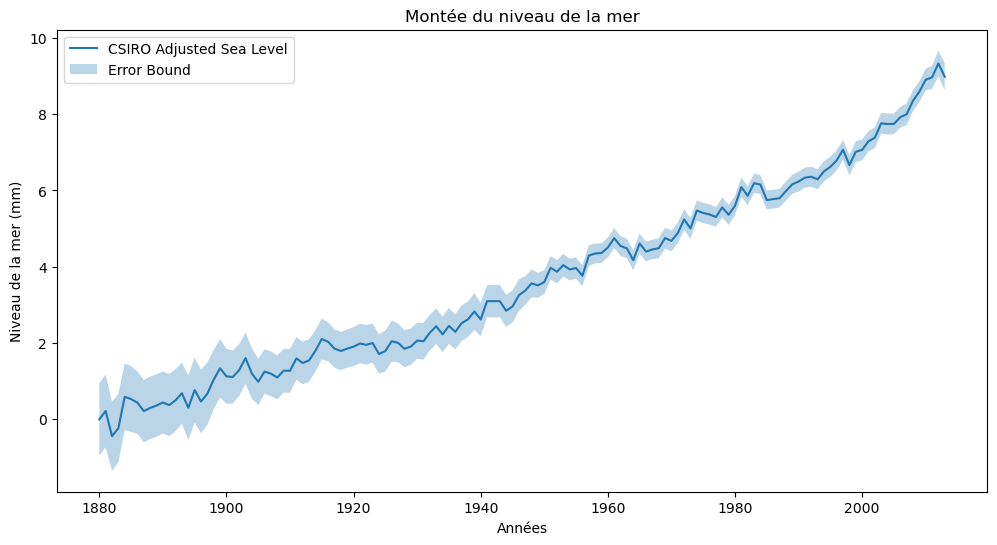

In [29]:
import matplotlib.pyplot as plt

# Données pour les courbes
years = df_sea['Year']
csiro_level = df_sea['CSIRO Adjusted Sea Level']
lower_bound = df_sea['Lower Error Bound']
upper_bound = df_sea['Upper Error Bound']

# Créer le graphique
plt.figure(figsize=(12, 6))

# Courbe CSIRO Adjusted Sea Level
plt.plot(years, csiro_level, label='CSIRO Adjusted Sea Level')

# Courbes Lower et Upper Error Bound
plt.fill_between(years, lower_bound, upper_bound, alpha=0.3, label='Error Bound')

# Ajouter un titre et des labels aux axes
plt.title("Montée du niveau de la mer")
plt.xlabel("Années")
plt.ylabel("Niveau de la mer (mm)")

# Ajouter une légende
plt.legend()

# Afficher le graphique
plt.show()

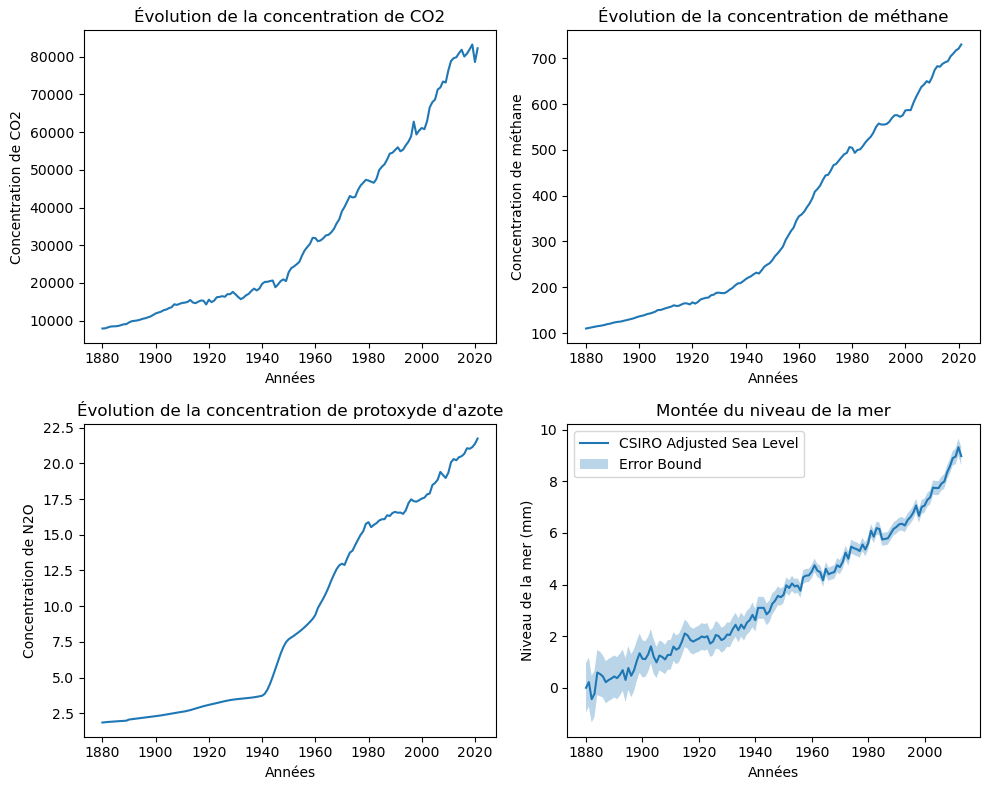

In [30]:

# Créer la figure et les sous-graphes
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
annees =df['Year']
# Courbe du CO2
axs[0, 0].plot(annees, co2_concentration)
axs[0, 0].set_title("Évolution de la concentration de CO2")
axs[0, 0].set_xlabel("Années")
axs[0, 0].set_ylabel("Concentration de CO2")

# Courbe du CH4
axs[0, 1].plot(annees, ch4_concentration)
axs[0, 1].set_title("Évolution de la concentration de méthane")
axs[0, 1].set_xlabel("Années")
axs[0, 1].set_ylabel("Concentration de méthane")

# Courbe du N2O
axs[1, 0].plot(annees, n2o_concentration)
axs[1, 0].set_title("Évolution de la concentration de protoxyde d'azote")
axs[1, 0].set_xlabel("Années")
axs[1, 0].set_ylabel("Concentration de N2O")

# Courbe de la montée du niveau de la mer
axs[1, 1].plot(years, csiro_level, label='CSIRO Adjusted Sea Level')
axs[1, 1].fill_between(years, lower_bound, upper_bound, alpha=0.3, label='Error Bound')
axs[1, 1].set_title("Montée du niveau de la mer")
axs[1, 1].set_xlabel("Années")
axs[1, 1].set_ylabel("Niveau de la mer (mm)")
axs[1, 1].legend()

# Ajuster l'espacement entre les sous-graphes
plt.tight_layout()

# Afficher la figure
plt.show()

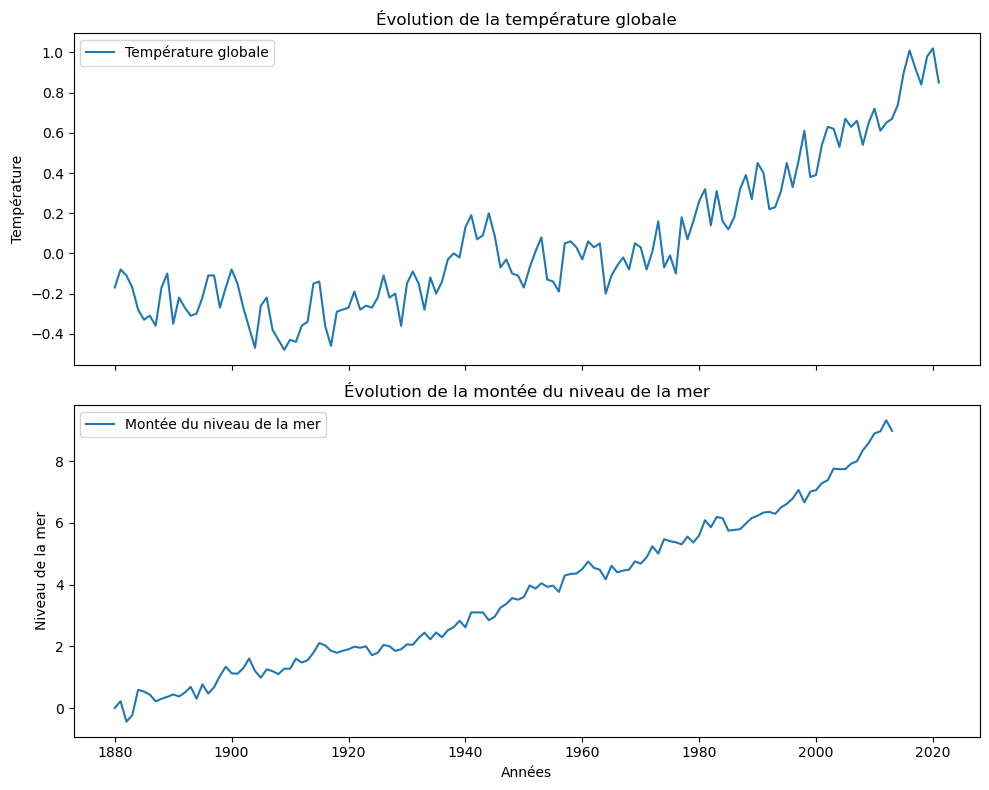

In [31]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Graphique de la température globale
ax1.plot(df['Year'], df['Glob'], label='Température globale')
ax1.set_ylabel("Température")
ax1.set_title("Évolution de la température globale")

# Graphique de la montée du niveau de la mer
ax2.plot(df_sea['Year'], df_sea['CSIRO Adjusted Sea Level'], label='Montée du niveau de la mer')
ax2.set_xlabel("Années")
ax2.set_ylabel("Niveau de la mer")
ax2.set_title("Évolution de la montée du niveau de la mer")

# Ajouter une légende
ax1.legend()
ax2.legend()

# Ajuster l'espacement entre les graphiques
plt.tight_layout()

# Afficher les graphiques
plt.show()

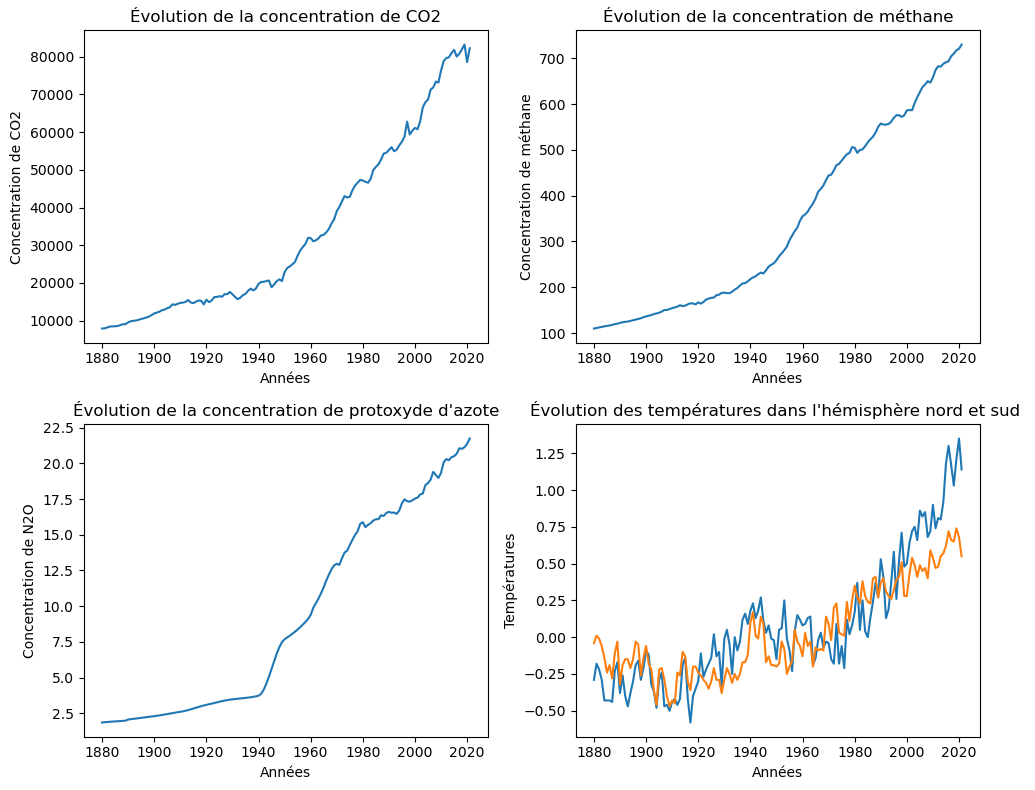

In [35]:
import matplotlib.pyplot as plt

temperature_hemisphere_nord = df['NHem']
temperature_hemisphere_sud = df['SHem']

# Créer la figure et les sous-graphes
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Courbe du CO2
axs[0, 0].plot(annees, co2_concentration)
axs[0, 0].set_title("Évolution de la concentration de CO2")
axs[0, 0].set_xlabel("Années")
axs[0, 0].set_ylabel("Concentration de CO2")

# Courbe du CH4
axs[0, 1].plot(annees, ch4_concentration)
axs[0, 1].set_title("Évolution de la concentration de méthane")
axs[0, 1].set_xlabel("Années")
axs[0, 1].set_ylabel("Concentration de méthane")

# Courbe du N2O
axs[1, 0].plot(annees, n2o_concentration)
axs[1, 0].set_title("Évolution de la concentration de protoxyde d'azote")
axs[1, 0].set_xlabel("Années")
axs[1, 0].set_ylabel("Concentration de N2O")

# Courbe HemN
axs[1, 1].plot(annees, temperature_hemisphere_nord, label='NHem')
axs[1, 1].plot(annees, temperature_hemisphere_sud, label='SHem')
axs[1, 1].set_title("Évolution des températures dans l'hémisphère nord et sud ")
axs[1, 1].set_xlabel("Années")
axs[1, 1].set_ylabel("Températures")

# Ajuster l'espacement entre les sous-graphes
plt.tight_layout()

# Afficher la figure
plt.show()


In [62]:
# Enregistrer les résultats sur le bureau
df.to_csv('~/Desktop/niveau_océan.csv', index=False)